In [7]:
import pandas as pd
import nasdaqdatalink as nddl
# quandl is the older version, the new version is called nasdaqdatalink so we should use this
# so far the syntax are the same except fot he package name change.

In [8]:
# store the api key (just the key in a text file with this name) if using this method
nddl.read_key(filename="nasdaqdatalinkapikey.txt")
# or use nddl.ApiConfig.api_key = api_key

In [3]:
# get the indicator table
zindicators = nddl.get_table("ZILLOW/INDICATORS")
zindicators

,indicator_id,indicator,category
None,,,
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values
5,Z5BR,ZHVI 5+ Bedroom Time Series ($),Home values
6,Z4BR,ZHVI 4-Bedroom Time Series ($),Home values
7,Z3BR,ZHVI 3-Bedroom Time Series ($),Home values
8,Z2BR,ZHVI 2-Bedroom Time Series ($),Home values


In [4]:
# get the data table by indicator (the whole table is huge), paginate= True will retrieve more than 10K rows, otherwise limit to 10K rows.
sssm_data = nddl.get_table("ZILLOW/DATA", indicator_id='SSSM', paginate=True)
sssm_data

,indicator_id,region_id,date,value
None,,,,
0,SSSM,845167,2023-07-31,134000.0
1,SSSM,845167,2023-06-30,140167.0
2,SSSM,845167,2023-05-31,138000.0
3,SSSM,845167,2023-04-30,136333.0
4,SSSM,845167,2023-03-31,132167.0
...,...,...,...,...
90700,SSSM,102001,2008-06-30,186694.0
90701,SSSM,102001,2008-05-31,183360.0
90702,SSSM,102001,2008-04-30,180194.0


In [5]:
# save pd to csv file for use next time without calling API again
# need to create data folder first
sssm_data.to_csv('./data/sssm_full.csv')

In [9]:
import matplotlib.pyplot as plt

In [11]:
# read from csv file instead of using API
sssm_data = pd.read_csv('./data/sssm_full.csv')

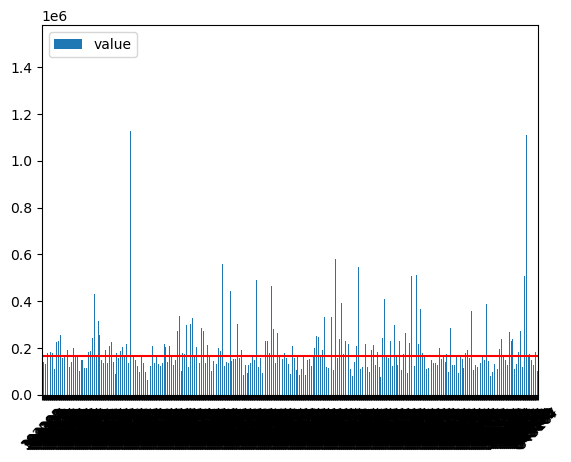

In [16]:
# plotting median house price by regions with the national median as a red reference line
sssm_region_gby_region = sssm_data.groupby('region_id').agg({'value': 'median'})
sssm_region_gby_region.plot(kind='bar', rot=45)
# plt.xlabel("")
plt.hlines(sssm_region_gby_region.median(),0, 1000, color='r')